In [48]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler




In [49]:
# Load dataset
df = pd.read_csv('fruit.csv')
df.head()

,label,ph,temperature,humidity,altitude,rainfall,N,P,K
0,Almond,7.49,24.92,39.95,1418,391.61,89,33,107
1,Almond,6.79,19.50,55.61,637,448.88,70,35,113
2,Almond,6.16,21.25,44.71,1448,495.32,69,28,83
3,Almond,6.53,20.02,45.31,526,392.97,107,40,80
4,Almond,6.91,27.48,42.42,252,480.43,36,21,107


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11000 entries, 0 to 10999
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   label        11000 non-null  object 
 1   ph           11000 non-null  float64
 2   temperature  11000 non-null  float64
 3   humidity     11000 non-null  float64
 4   altitude     11000 non-null  int64  
 5   rainfall     11000 non-null  float64
 6   N            11000 non-null  int64  
 7   P            11000 non-null  int64  
 8   K            11000 non-null  int64  
dtypes: float64(4), int64(4), object(1)
memory usage: 773.6+ KB


In [30]:
# Check for missing values
df.isnull().sum()

label          0
ph             0
temperature    0
humidity       0
altitude       0
rainfall       0
N              0
P              0
K              0
dtype: int64

In [31]:
df.columns

Index(['label', 'ph', 'temperature', 'humidity', 'altitude', 'rainfall', 'N',
       'P', 'K'],
      dtype='object')

In [32]:
df.shape

(11000, 9)

In [33]:
df['label'].unique()

array(['Banana', 'Orange', 'Pomegranates', 'Pineapple', 'Lychee',
       'Grapes', 'kiwi', 'Peaches', 'Lemons', 'Limes', 'Plum', 'Apricots',
       'Dragon Fruit', 'Starfruit', 'Avocado', 'Watermelons', 'Java Plum',
       'Apple', 'Custard Apple', 'Cranberries', 'Guavas', 'Jackfruits',
       'Chayote Fruit', 'Mango', 'Almond', 'Apricot', 'Chayote',
       'Chestnut', 'Date Palm', 'Guava', 'Jackfruit', 'Kiwi', 'Loquat',
       'Olive', 'Papaya', 'Plums', 'StarFruit', 'Strawberries', 'Walnut'],
      dtype=object)

In [34]:
df['label'].value_counts()

label
Cranberries      400
Limes            400
Custard Apple    400
Apple            400
Java Plum        400
Watermelons      400
Avocado          400
Dragon Fruit     400
Mango            400
Orange           400
Lemons           400
Peaches          400
Grapes           400
Lychee           400
Pineapple        400
Pomegranates     400
Loquat           200
Kiwi             200
Guava            200
Jackfruit        200
Papaya           200
Olive            200
Chestnut         200
Plums            200
StarFruit        200
Strawberries     200
Date Palm        200
Banana           200
Chayote          200
Apricot          200
Almond           200
Chayote Fruit    200
Jackfruits       200
Guavas           200
Starfruit        200
Apricots         200
Plum             200
kiwi             200
Walnut           200
Name: count, dtype: int64

In [35]:
df.describe()

,ph,temperature,humidity,altitude,rainfall,N,P,K
count,11000.000000,11000.000000,11000.000000,11000.000000,11000.000000,11000.000000,11000.000000,11000.000000
mean,7.769507,24.649358,61.852875,882.487182,1232.033585,126.323455,47.414000,175.752273
std,78.904318,5.639259,11.809286,642.667409,8492.328659,38.943147,24.816308,100.047868
min,4.000000,10.000000,30.010000,60.000000,65.290000,30.000000,15.000000,20.000000
25%,5.970000,21.040000,54.030000,443.000000,919.820000,102.000000,29.000000,121.000000
50%,6.380000,24.890000,63.330000,755.000000,1140.460000,123.000000,38.000000,167.000000
75%,6.810000,28.570000,71.162500,1129.000000,1369.102500,146.000000,61.000000,212.000000
max,7897.100000,39.830000,84.980000,4000.000000,891040.870000,300.000000,140.000000,1185.000000


Statistical plots for: ph


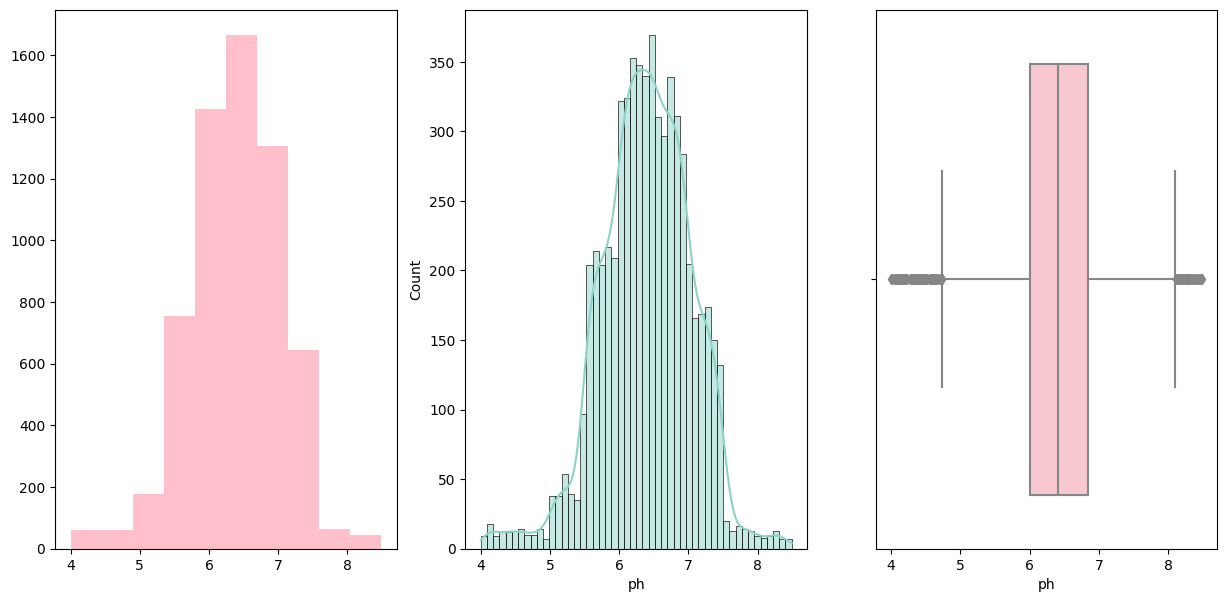

------------------------------------------------------------
Statistical plots for: temperature


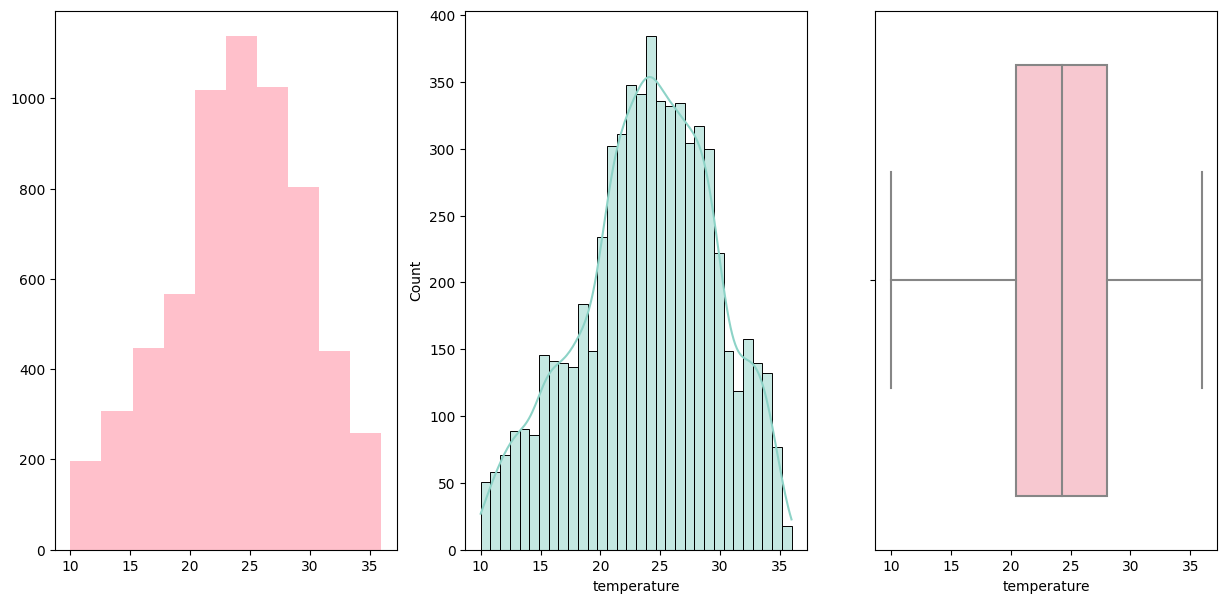

------------------------------------------------------------
Statistical plots for: humidity


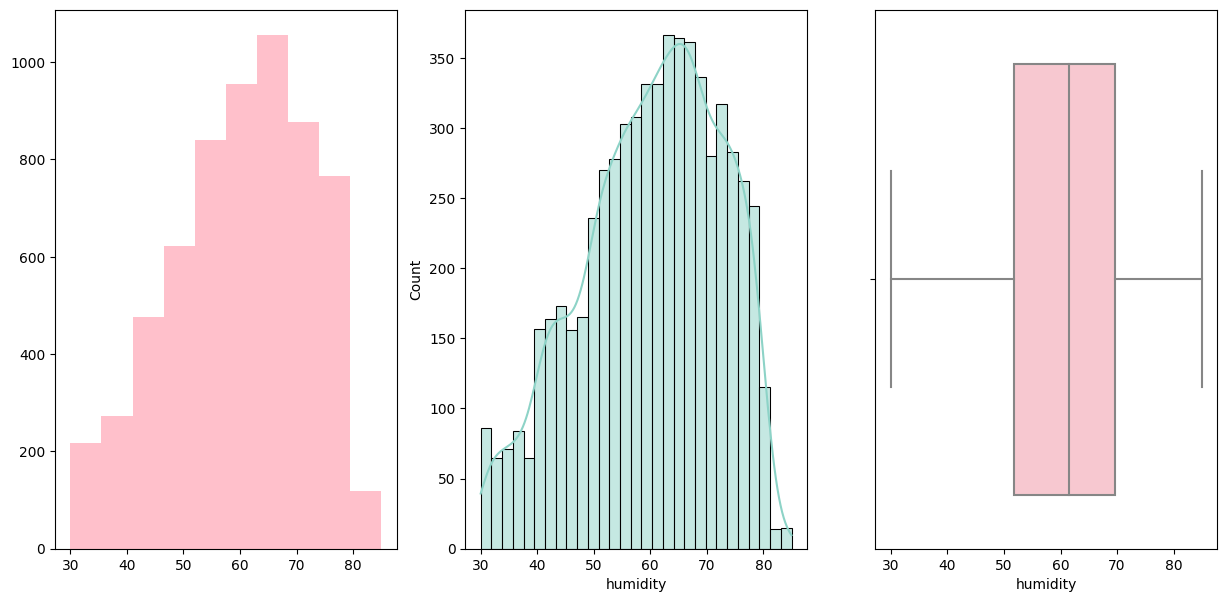

------------------------------------------------------------
Statistical plots for: altitude


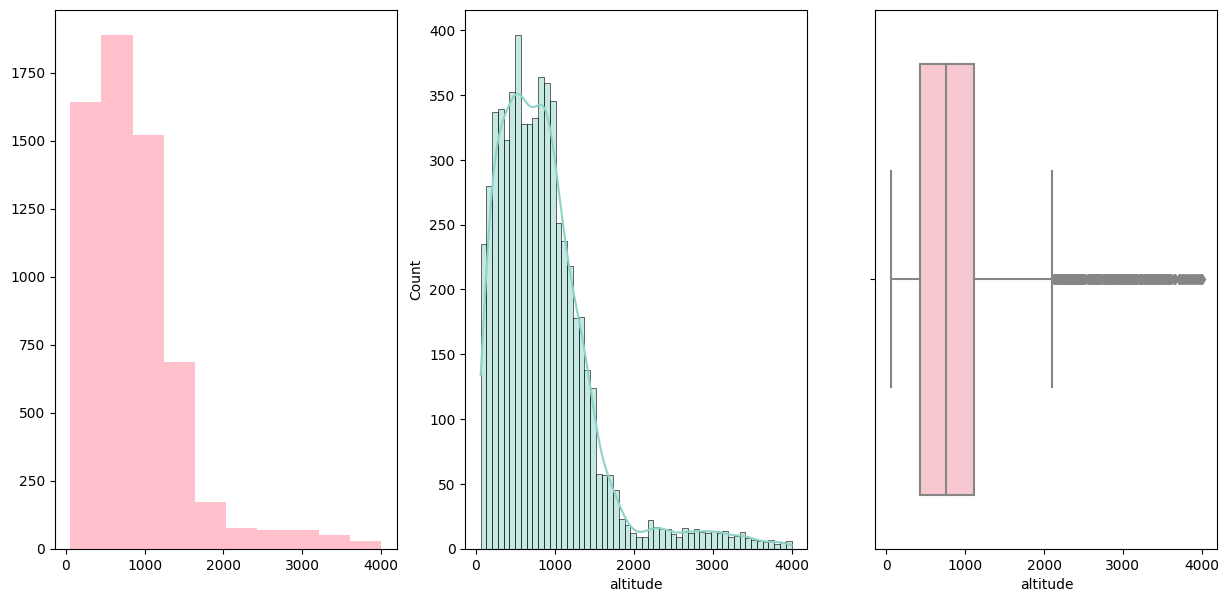

------------------------------------------------------------
Statistical plots for: rainfall


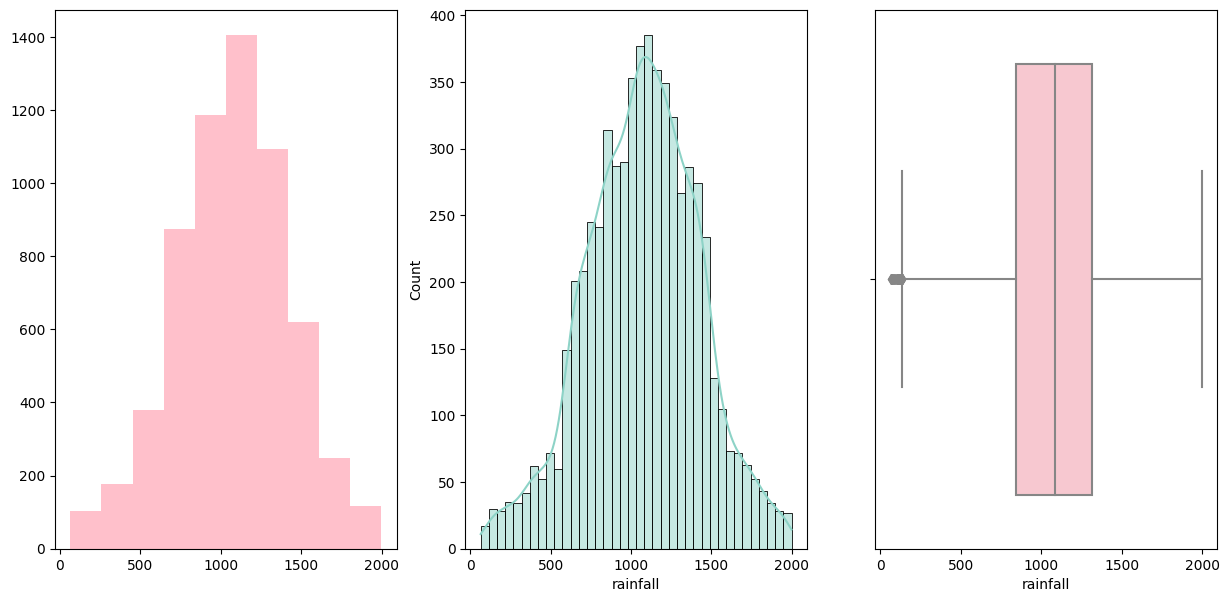

------------------------------------------------------------
Statistical plots for: N


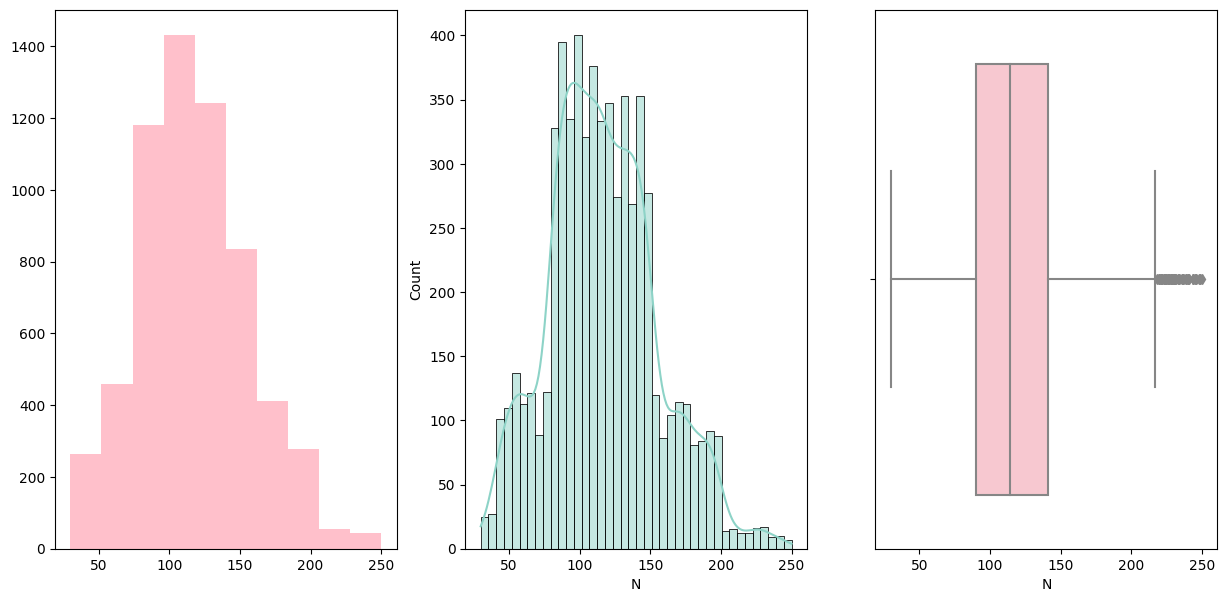

------------------------------------------------------------
Statistical plots for: P


KeyboardInterrupt: 

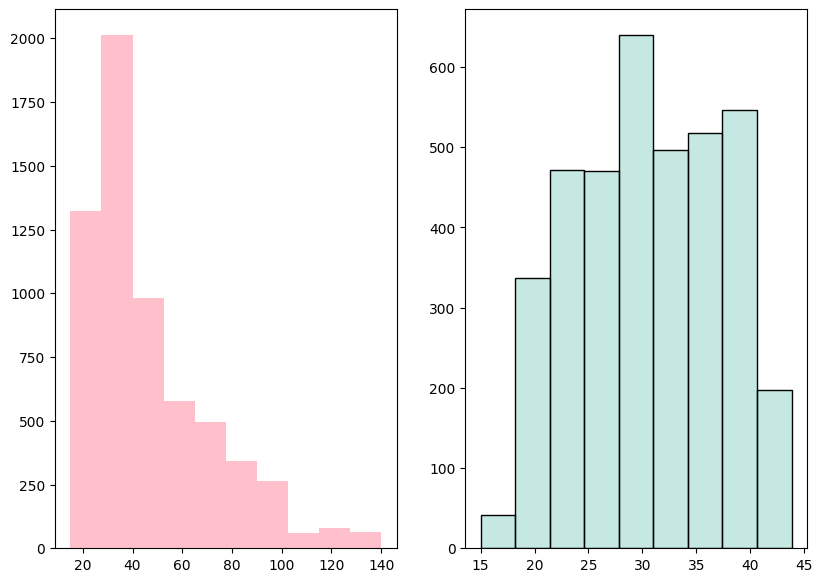

In [50]:
# Visualize data distribution and characteristics
def visualize(df, col):
    plt.figure(figsize=(15, 7))
    plt.subplot(1, 3, 1)
    plt.hist(df[col], color='pink')

    plt.subplot(1, 3, 2)
    sns.histplot(df[col], kde=True)

    plt.subplot(1, 3, 3)
    sns.boxplot(x=df[col], color='pink')

    plt.show()

for col in df.columns[:-1]:  # Exclude the last column, assumed to be 'label'
    if col != 'label':
        print(f'Statistical plots for: {col}')
        visualize(df, col)
        print("-" * 60)


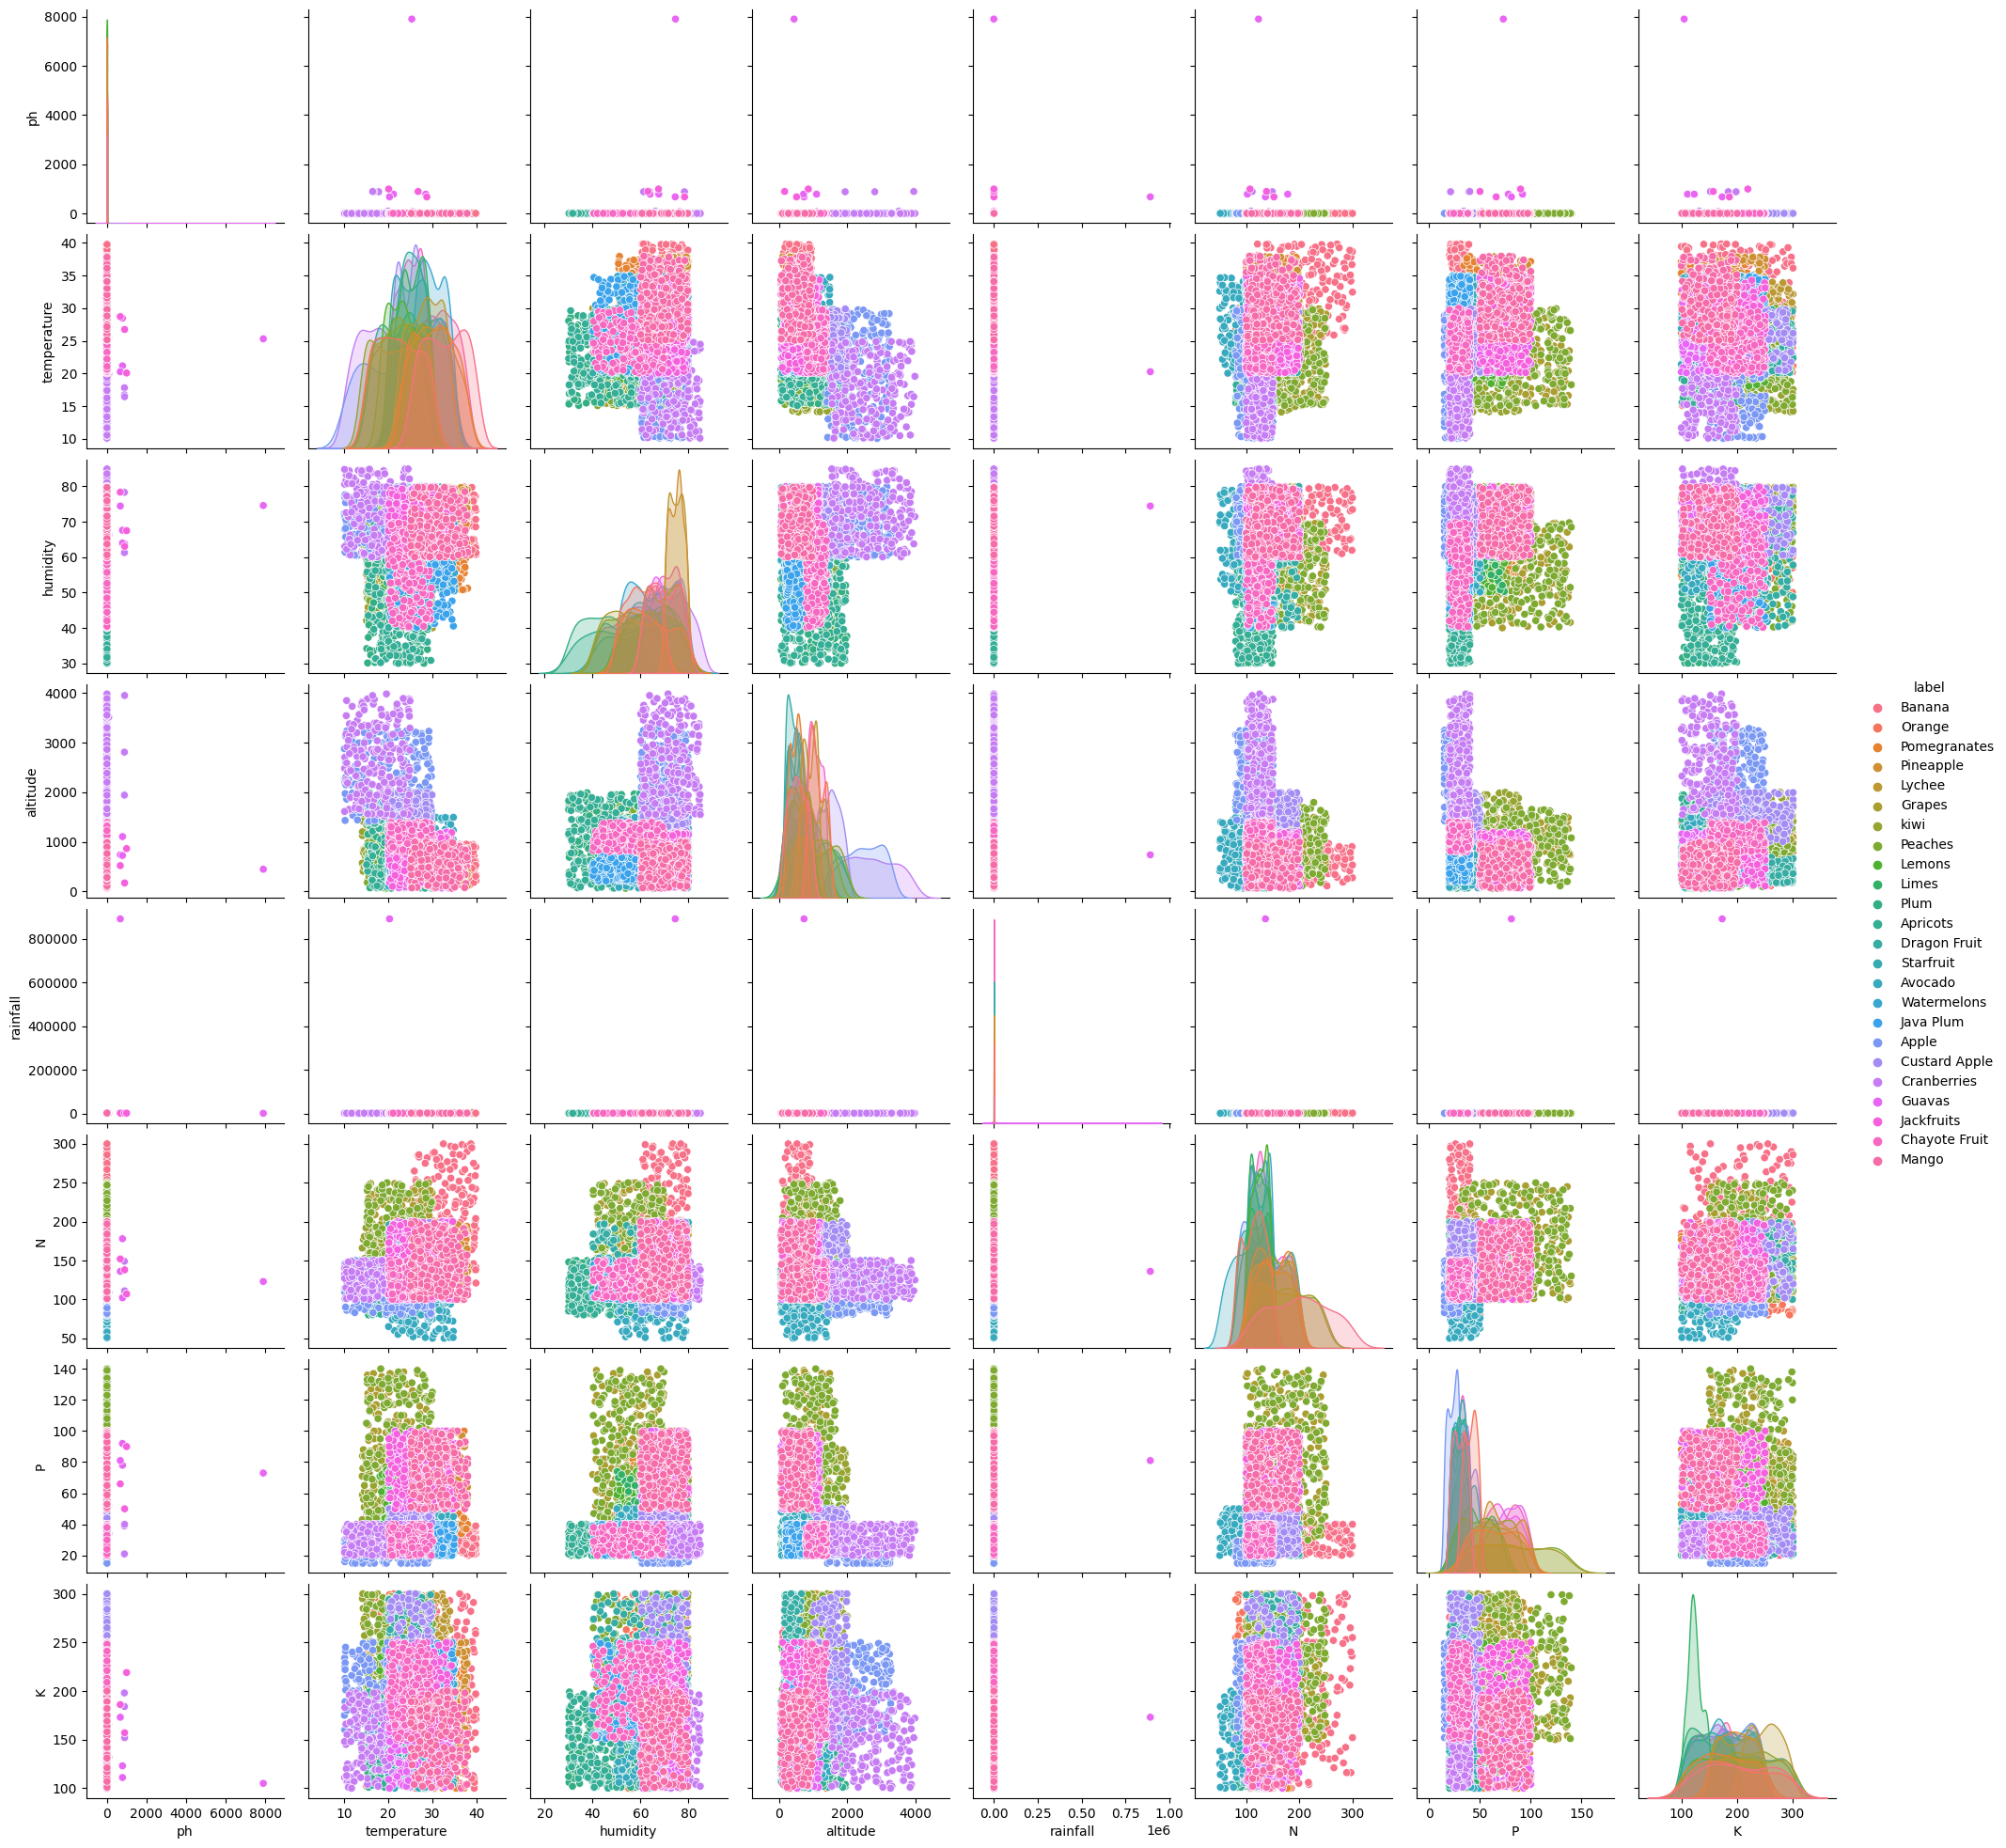

In [ ]:
sns.pairplot(df,hue = 'label')

<Axes: xlabel='label', ylabel='count'>

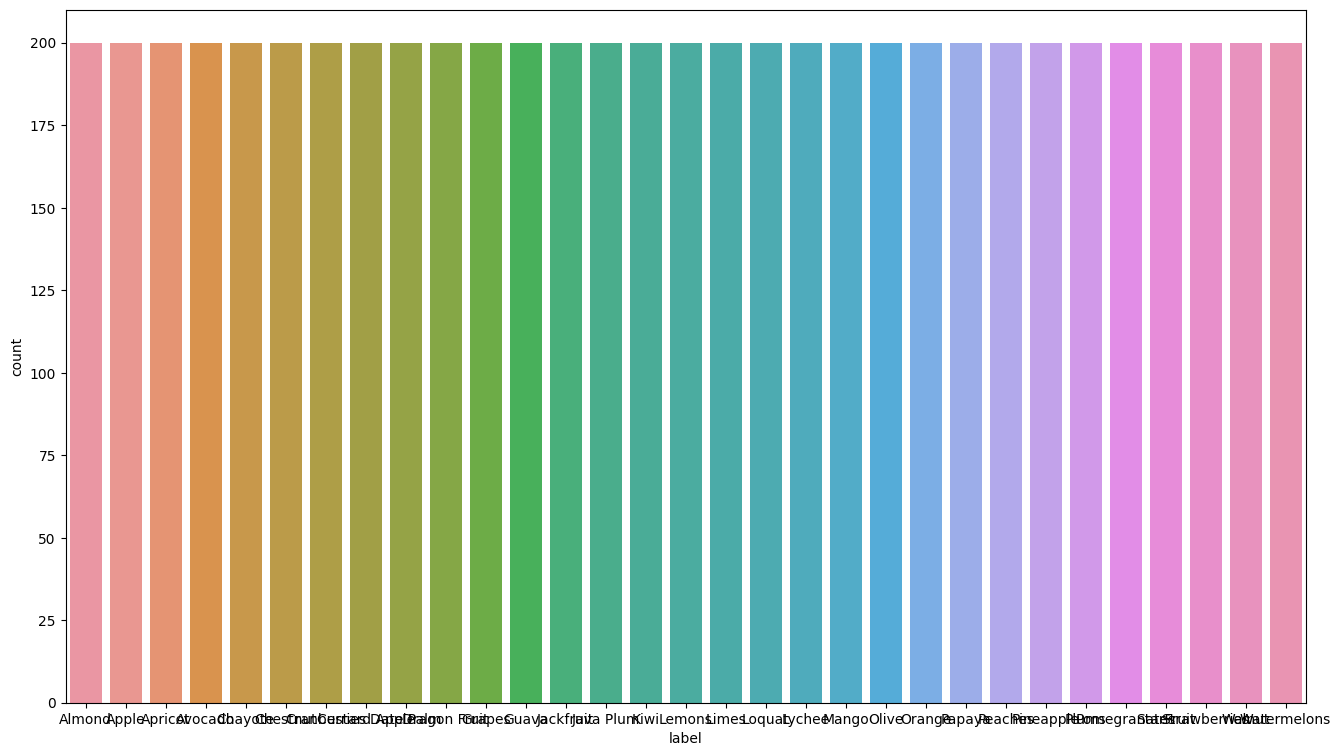

In [51]:
sns.set_palette('Set3')
plt.figure(figsize=(16,9))
sns.countplot(data=df,x = 'label')

In [52]:
df.shape

(6200, 9)

In [53]:
def handle_outliers_per_label(df, column):
    unique_labels = df['label'].unique()
    for label in unique_labels:
        label_data = df[df['label'] == label][column]
        q1 = label_data.quantile(0.25)
        q3 = label_data.quantile(0.75)
        iqr = q3 - q1
        upper_limit = q3 + 1.5 * iqr
        lower_limit = q1 - 1.5 * iqr
        df.loc[(df['label'] == label) & ((df[column] > upper_limit) | (df[column] < lower_limit)), column] = np.NaN

columns_to_handle_outliers = ['ph', 'temperature', 'humidity', 'altitude', 'rainfall', 'N', 'P', 'K']
for col in columns_to_handle_outliers:
    handle_outliers_per_label(df, col)

# Dropping rows with NaN values after handling outliers per label
df.dropna(inplace=True)


In [54]:
df.shape

(6200, 9)

In [55]:
df['label'].value_counts()

label
Almond           200
Limes            200
Walnut           200
Strawberries     200
StarFruit        200
Pomegranates     200
Plums            200
Pineapple        200
Peaches          200
Papaya           200
Orange           200
Olive            200
Mango            200
Lychee           200
Loquat           200
Lemons           200
Apple            200
Kiwi             200
Java Plum        200
Jackfruit        200
Guava            200
Grapes           200
Dragon Fruit     200
Date Palm        200
Custard Apple    200
Cranberries      200
Chestnut         200
Chayote          200
Avocado          200
Apricot          200
Watermelons      200
Name: count, dtype: int64

<Axes: xlabel='label', ylabel='count'>

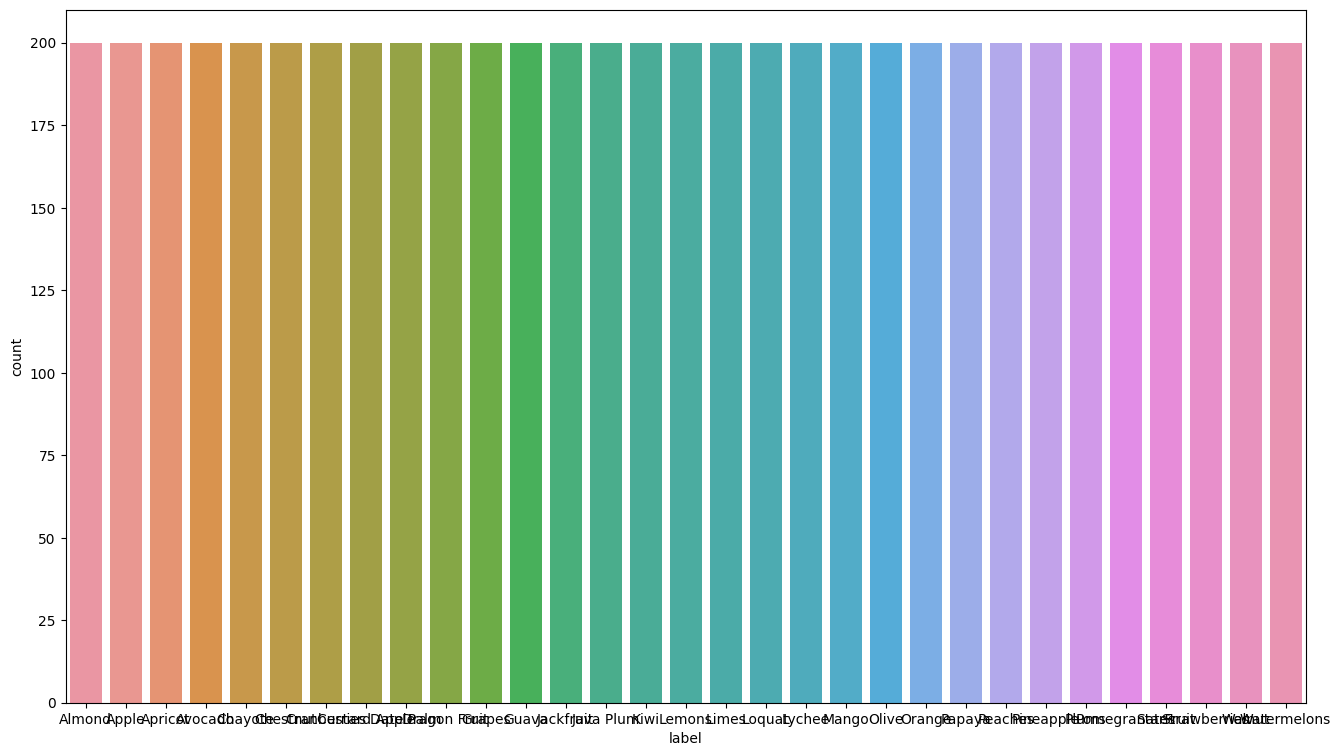

In [56]:
sns.set_palette('Set3')
plt.figure(figsize=(16,9))
sns.countplot(data=df,x = 'label')

In [57]:
from imblearn.over_sampling import SMOTE


In [58]:
from imblearn.over_sampling import SMOTE
# Balance the dataset using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(df.drop('label',  axis=1), df['label'])

# Concatenate resampled features and labels
balanced_df = pd.DataFrame(X_resampled, columns=df.drop('label', axis=1).columns)
balanced_df['label'] = y_resampled

# Save the balanced data to a new CSV file
balanced_df.to_csv('new_dataset.csv', index=False)

In [59]:
balanced_df.shape

(6200, 9)

<Axes: xlabel='label', ylabel='count'>

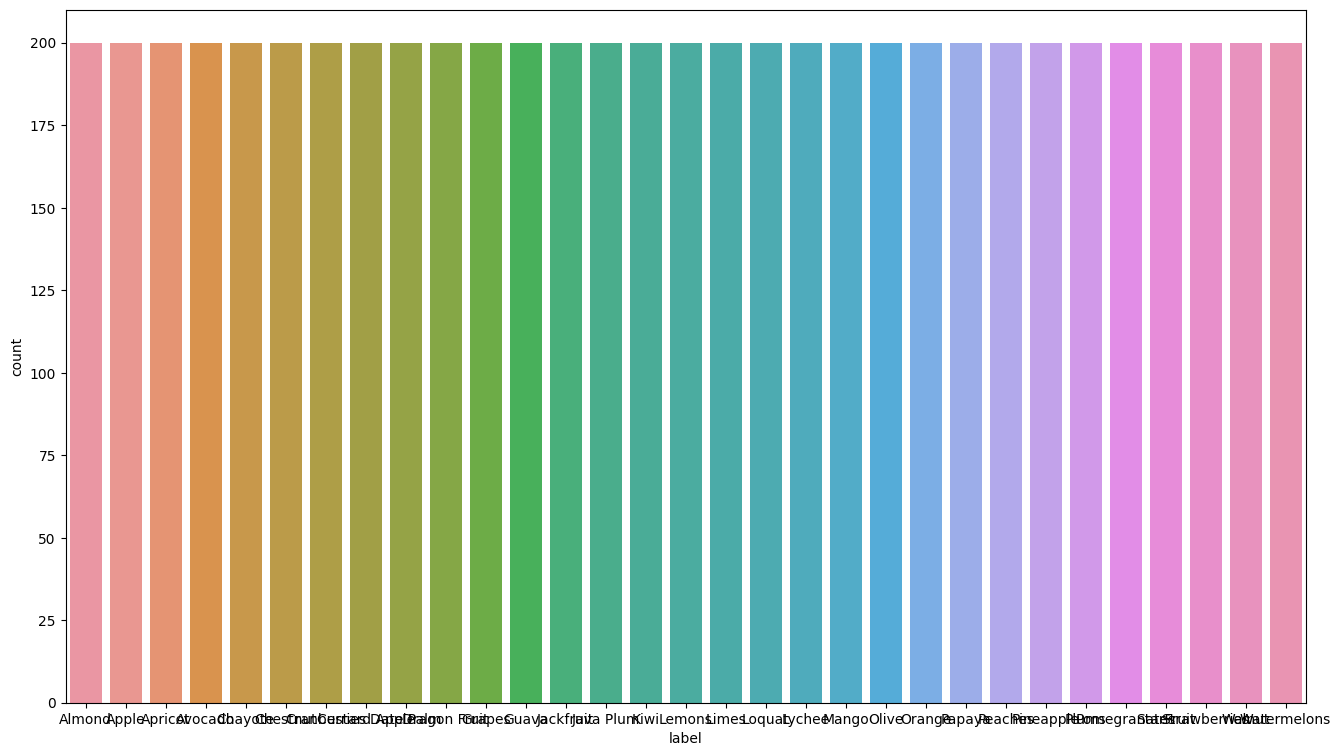

In [60]:
sns.set_palette('Set3')
plt.figure(figsize=(16,9))
sns.countplot(data=balanced_df,x = 'label')

In [61]:
balanced_df['label'].value_counts()

label
Almond           200
Limes            200
Walnut           200
Strawberries     200
StarFruit        200
Pomegranates     200
Plums            200
Pineapple        200
Peaches          200
Papaya           200
Orange           200
Olive            200
Mango            200
Lychee           200
Loquat           200
Lemons           200
Apple            200
Kiwi             200
Java Plum        200
Jackfruit        200
Guava            200
Grapes           200
Dragon Fruit     200
Date Palm        200
Custard Apple    200
Cranberries      200
Chestnut         200
Chayote          200
Avocado          200
Apricot          200
Watermelons      200
Name: count, dtype: int64